In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from  statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_excel('Data_Train (2).xlsx')

In [3]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


this are the first 5 columns present in the dataset

In [5]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


this are the last 5 columns present in the dataset

In [6]:
df.sample(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
394,QUICK BITES,8105,"Bengali, North Indian","12noon – 4pm, 7pm – 11pm (Mon-Sun)",New Delhi,Chittaranjan Park,3.9,873 votes,500
7996,CASUAL DINING,3677,"North Indian, Biryani, Mughlai, Kebab","11am – 11pm (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,Marathahalli,3.5,186 votes,800
4150,"CASUAL DINING,CAFÉ",3609,"Continental, Mexican, Cafe, Desserts, Italian,...",7am – 11pm (Mon-Sun),Navi Mumbai,Kharghar,4.4,2811 votes,850
9084,CAFÉ,14140,"Cafe, Continental, Chinese, Mexican",11am – 3am (Mon-Sun),Mumbai,Andheri West,NEW,NaN,1100
10851,CASUAL DINING,1533,"Kebab, Arabian",1pm – 12midnight (Mon-Sun),Hyderabad,Tolichowki,3.5,61 votes,500


this are the some random sample

In [7]:
df.shape

(12690, 9)

this dataset contains 12690 rows and the 9 columns out of that 1 is our target variable

In [8]:
df.columns.to_list()

['TITLE',
 'RESTAURANT_ID',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'COST']

this are the column names of our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


this dataset contains the 2 columns of ('int64') and 7 columns of ('object')

In [10]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

this are the datatypes of the features

In [11]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

as we can see in the 'CITY','LOCALITY','RATING','VOTES' are having some null values 

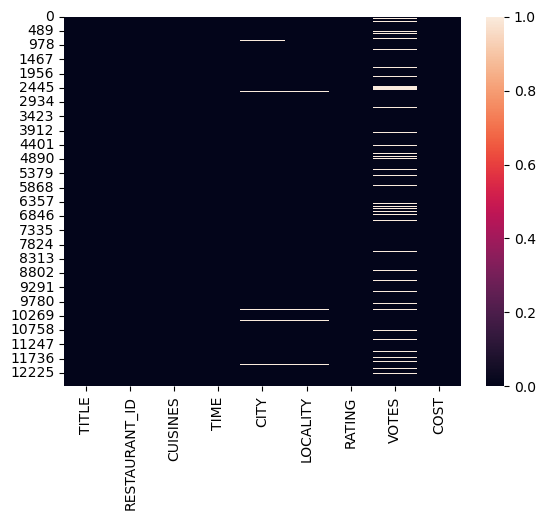

In [12]:
sns.heatmap(df.isnull())
plt.show()

in this  heatmap we can see there is some white lines present in the heatmap that are representing the presence of outliers
let's handle this null values

In [13]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [14]:
df['CITY']=df['CITY'].fillna(df['CITY'].mode()[0])

In [15]:
df['LOCALITY']=df['LOCALITY'].fillna(df['LOCALITY'].mode()[0])

In [16]:
df['RATING']=df['RATING'].fillna(df['RATING'].mode()[0])

In [17]:
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mode()[0])

In [18]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

here we have filled the null values

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, Euro

In [20]:
df.nunique().to_frame()

,0
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [21]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

as we can see in the rating feature it contains numeric values but it's datatype is object because we have one string value present in this feature so lets change the datatype of 'RATING' feature 

In [22]:
df[df['RATING']=='NEW']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,44 votes,200
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,44 votes,200
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,44 votes,800
117,QUICK BITES,8091,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,NEW,44 votes,500
120,QUICK BITES,4993,"North Indian, South Indian","7:30am – 9:30pm (Mon-Sat),Closed (Sun)",Bangalore-560066,Whitefield,NEW,44 votes,150
...,...,...,...,...,...,...,...,...,...
12602,QUICK BITES,11176,"Rolls, North Indian, Biryani",12noon – 12midnight (Mon-Sun),Mumbai,Mahakali,NEW,44 votes,200
12613,CASUAL DINING,397,"Asian, Thai, Sushi, Healthy Food",12noon – 11pm (Mon-Sun),Gurgaon,DLF Phase 4,NEW,44 votes,950
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,44 votes,1200
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,44 votes,400


because RATINGS are the numbers of the satisfaction  level of  customers it is independent feature so that,s why we can not change this new value with the mean or median we will keep this feature constant  

In [23]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


in this dataset we have only two numeric features('RESTAURANT_ID','COST') as we can see in the above row into the describe method.

# separating features

In [24]:
object_col=[]
numerical_col=[]

In [25]:
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
    else:
        object_col.append(i)
        
print('numerical_columns',numerical_col)
print('\n')
print('categorical_col',object_col)

numerical_columns ['RESTAURANT_ID', 'COST']


categorical_col ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']


# Data Analysis

<Axes: xlabel='COST', ylabel='Density'>

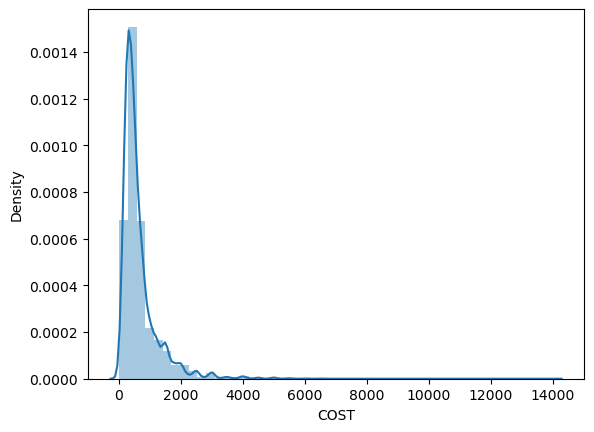

In [26]:
sns.distplot(df['COST'])

In [27]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


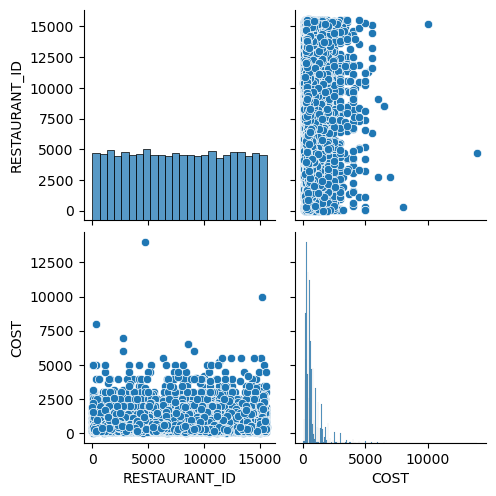

In [28]:
sns.pairplot(df)

# Label Encoding using (Label Encoder)

In [29]:
lb=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,9438,2627.0,739.0,320.0,285.0,17.0,1278.0,1200
1,33.0,13198,289.0,1885.0,67.0,1046.0,23.0,950.0,1500
2,31.0,10915,2976.0,661.0,67.0,1101.0,19.0,712.0,800
3,95.0,6346,4130.0,275.0,222.0,136.0,22.0,787.0,800
4,50.0,15387,1766.0,615.0,222.0,620.0,19.0,470.0,300
...,...,...,...,...,...,...,...,...,...
12685,95.0,13228,2934.0,1144.0,131.0,342.0,19.0,1349.0,500
12686,33.0,9686,2143.0,1177.0,222.0,133.0,24.0,191.0,1800
12687,71.0,11133,2088.0,1137.0,239.0,1342.0,21.0,1428.0,1300
12688,31.0,6134,3506.0,1837.0,67.0,631.0,16.0,996.0,400


# spliting the features

In [30]:
x=df.drop('COST',axis=1)
y=df['COST']
print(x,y)

       TITLE  RESTAURANT_ID  CUISINES    TIME   CITY  LOCALITY  RATING   VOTES
0       31.0           9438    2627.0   739.0  320.0     285.0    17.0  1278.0
1       33.0          13198     289.0  1885.0   67.0    1046.0    23.0   950.0
2       31.0          10915    2976.0   661.0   67.0    1101.0    19.0   712.0
3       95.0           6346    4130.0   275.0  222.0     136.0    22.0   787.0
4       50.0          15387    1766.0   615.0  222.0     620.0    19.0   470.0
...      ...            ...       ...     ...    ...       ...     ...     ...
12685   95.0          13228    2934.0  1144.0  131.0     342.0    19.0  1349.0
12686   33.0           9686    2143.0  1177.0  222.0     133.0    24.0   191.0
12687   71.0          11133    2088.0  1137.0  239.0    1342.0    21.0  1428.0
12688   31.0           6134    3506.0  1837.0   67.0     631.0    16.0   996.0
12689   31.0           6430    2946.0   835.0  131.0    1333.0    15.0  1505.0

[12690 rows x 8 columns] 0        1200
1        150

# scaling the features using (Standard Scaler)

In [31]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.868887,0.372692,0.325408,-0.584658,2.117762,-0.920549,-0.290547,0.593884
1,-0.807839,1.207377,-1.616381,0.934369,-0.897082,0.986239,0.680153,-0.085891
2,-0.868887,0.700572,0.615265,-0.688048,-0.897082,1.124048,0.033020,-0.579143
3,1.084647,-0.313702,1.573701,-1.199692,0.949957,-1.293888,0.518369,-0.423707
4,-0.288931,1.693314,-0.389682,-0.749021,0.949957,-0.081161,0.033020,-1.080685
...,...,...,...,...,...,...,...,...
12685,1.084647,1.214036,0.580382,-0.047829,-0.134433,-0.777728,0.033020,0.741031
12686,-0.807839,0.427746,-0.076570,-0.004088,0.949957,-1.301405,0.841936,-1.658909
12687,0.352072,0.748966,-0.122250,-0.057108,1.152535,1.727906,0.356586,0.904757
12688,-0.868887,-0.360764,1.055448,0.870745,-0.897082,-0.053599,-0.452330,0.009443


# checking variance inflation factor

In [32]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF VALUES']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,VIF VALUES
0,TITLE,1.067022
1,RESTAURANT_ID,1.004661
2,CUISINES,1.078877
3,TIME,1.013456
4,CITY,1.004052
5,LOCALITY,1.003385
6,RATING,1.005901
7,VOTES,1.000791


# modeling

# creating train test split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

# Linear Regression

In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_train=lr.predict(x_train)
print('r2_score on training data',r2_score(y_train,lr_train))
print('r2_score on test data',r2_score(y_test,lr_pred))
print('mean_squared_error',mean_squared_error(y_test,lr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,lr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,lr_pred)))

r2_score on training data 0.12604745034961784
r2_score on test data 0.13065634354292344
mean_squared_error 301823.9222137875
mean_absolute_error 341.1978492998976
sqrt mean_squared_error 549.3850400345713


# svr(support vector regressor)

In [36]:
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_train=svr.predict(x_train)
print('r2_score on training data',r2_score(y_train,svr_train))
print('r2_score on testing data',r2_score(y_test,svr_pred))
print('mean_squared_error',mean_squared_error(y_test,svr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,svr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,svr_pred)))

r2_score on training data 0.03203300778880813
r2_score on testing data 0.04406761858923347
mean_squared_error 331886.31283560704
mean_absolute_error 309.60990542585705
sqrt mean_squared_error 576.0957497114581


# kneighbors Regressor

In [38]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_train=knn.predict(x_train)
print('r2_score on training data',r2_score(y_train,knn_train))
print('r2_score training data',r2_score(y_test,knn_pred))
print('mean_squared_error',mean_squared_error(y_test,knn_pred))
print('sqrt mean_squared_erroe',np.sqrt(mean_squared_error(y_test,knn_pred)))

r2_score on training data 0.5795139623352931
r2_score training data 0.339474019048433
mean_squared_error 229325.35460992908
sqrt mean_squared_erroe 478.87926934659544


# decision Tree regressor

In [59]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
dtr_train=dtr.predict(x_train)
print('r2_score on training data',r2_score(y_train,dtr_train))
print('r2_score on testing data',r2_score(y_test,dtr_pred))
print('mean_squared_error',mean_squared_error(y_test,dtr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,dtr_pred))
print('np sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,dtr_pred)))

r2_score on training data 1.0
r2_score on testing data 0.38417780976917415
mean_squared_error 213804.8255844497
mean_absolute_error 266.3212503283425
np sqrt mean_squared_error 462.3903389826064


# Random Forest Regressor

In [44]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_train=rfr.predict(x_train)
print('r2_score on training data',r2_score(y_train,rfr_train))
print('r2_score on testing data',r2_score(y_test,rfr_pred))
print('mean_squared_error',mean_squared_error(y_test,rfr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,rfr_pred))
print('np sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,rfr_pred)))

r2_score on training data 0.9588619398988244
r2_score on testing data 0.6984450972492827
mean_squared_error 104695.63196900448
mean_absolute_error 189.77074862096137
np sqrt mean_squared_error 323.5670440094363


# Extra Trees Regressor

In [45]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
etr_train=etr.predict(x_train)
print('r2_score on training data',r2_score(y_train,etr_train))
print('r2_score on testing data',r2_score(y_test,etr_pred))
print('mean_squared_error',mean_squared_error(y_test,etr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,etr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,etr_pred)))

r2_score on training data 0.9999992819320301
r2_score on testing data 0.7190948805190631
mean_squared_error 97526.31689658524
mean_absolute_error 193.23763330706595
sqrt mean_squared_error 312.2920378373186


# AdaBoost Regressor

In [47]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred=abr.predict(x_test)
abr_train=abr.predict(x_train)
print('r2_score on train data',r2_score(y_train,abr_train))
print('r2_score on test data',r2_score(y_test,abr_pred))
print('mean_squared_error',mean_squared_error(y_test,abr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,abr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,abr_pred)))

r2_score on train data -0.47115454304369697
r2_score on test data -0.7752641284664896
mean_squared_error 616346.8016812436
mean_absolute_error 671.0589031481318
sqrt mean_squared_error 785.0775768554619


In [49]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_train=gbr.predict(x_train)
print('r2_score on training data',r2_score(y_train,gbr_train))
print('r2_score on test data',r2_score(y_test,gbr_pred))
print('mean_squared_error',mean_squared_error(y_test,gbr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,gbr_pred)))

r2_score on training data 0.7305452623697087
r2_score on test data 0.7279370864342647
mean_squared_error 94456.4270428714
sqrt mean_squared_error 307.3376433873199


# cross validation score

In [54]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between the cross validation score and the r2_score',r2_score(y_test,lr_pred)-score1.mean()*100)


[0.10904359 0.11696751 0.14671702 0.12539729 0.14067632]
0.12776034956822604
difference between the cross validation score and the r2_score -12.64537861327968


In [55]:
score2=cross_val_score(svr,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,svr_pred)-score2.mean()))

[0.03297037 0.04616263 0.05579143 0.02707478 0.04269235]
0.04093831065419225
difference between the cross validation score and r2_score 0.003129307935041223


In [56]:
score3=cross_val_score(knn,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,knn_pred)-score3.mean())*100)

[0.31268869 0.37476546 0.34488701 0.35206747 0.40343602]
0.35756892901401055
difference between the cross validation score and the r2_score -1.8094909965577555


In [60]:
score4=cross_val_score(dtr,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,dtr_pred)-score4.mean())*100)

[0.5136502  0.33644226 0.46122383 0.44022906 0.47630188]
0.4455694452749638
difference between the cross validation score and the r2_score -6.139163550578964


In [62]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,rfr_pred)-score5.mean())*100)


[0.64852138 0.69566935 0.72815375 0.67937764 0.7580308 ]
0.7019505843107646
difference between the cross validation score and r2_score -0.35054870614819045


In [64]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,etr_pred)-score6.mean())*100)

[0.64823308 0.74158694 0.72893631 0.69607119 0.74027588]
0.7110206803312729
difference between the cross validation score and the r2_score 0.8074200187790259


In [65]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,abr_pred)-score7.mean())*100)

[ 0.1809034  -0.1757173  -0.64633406 -0.45620961 -0.56571262]
-0.332614038774277
difference between the cross validation score and the r2_score -44.26500896922126


In [63]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,gbr_pred)-score8.mean()))

[0.62600027 0.71909551 0.71374758 0.71165088 0.73330498]
0.7007598446985734
difference between the cross validation score and the r2_score 0.02717724173569125


here Extra Trees Regressor model is giving high r2_score it means it is our best performing model

# Hyper Parameter tunning

In [74]:
param={'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
      'n_estimators':[100,150,200,250,300,350],
      'ccp_alpha':[0.00001,0.0001,0.0001,0.000001],
      'max_depth':[2,4,5,7,8]}

model=ExtraTreesRegressor()

In [75]:
grid=RandomizedSearchCV(model,param,cv=5)


In [83]:
final_model=ExtraTreesRegressor()
final_model.fit(x_train,y_train)
final_pred=final_model.predict(x_test)
print('r2_score',r2_score(y_test,final_pred))
print('mean_squared_error',mean_squared_error(y_test,final_pred))
print('mean_absolute_error',mean_absolute_error(y_test,final_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,final_pred)))

r2_score 0.7165789613996966
mean_squared_error 98399.80872106647
mean_absolute_error 194.20533490937748
sqrt mean_squared_error 313.68743793952996


# Saving model

In [114]:
import joblib

In [115]:
joblib.dump(final_model,'restaurant_analysis.pkl')

['restaurant_analysis.pkl']

In [116]:
score=joblib.load('restaurant_analysis.pkl')
score.predict(x_test)


array([ 355. ,  345.5,  735. , ...,  398.5,  584.5, 1019.5])

# Test file

In [84]:
data=pd.read_excel('Data_Test.xlsx')
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [85]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


this are the first 5 rows of the dataset

In [86]:
data.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


this are the last 5 rows of the dataset

In [87]:
data.sample(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
3780,CAFÉ,13251,"Cafe, Pizza",11am – 10pm (Mon-Sun),New Delhi,Hauz Khas,3.9,97 votes
3579,QUICK BITES,11343,Fast Food,11am – 9pm (Mon-Sun),Kochi,Kakkanad,-,NaN
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes
2927,QUICK BITES,15336,"South Indian, Chinese",9am – 10pm (Mon-Sun),Kochi,Marine Drive,-,NaN
1003,QUICK BITES,3264,"Arabian, Fast Food",10am – 11pm (Mon-Sun),Chennai,Egmore,4.0,491 votes


this are the some random sample of the dataset

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  float64
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  float64
 3   TIME           12690 non-null  float64
 4   CITY           12690 non-null  float64
 5   LOCALITY       12690 non-null  float64
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 892.4 KB


in this dataset 7 columns are ('float64') and remaining 2 are ('int64') 

In [89]:
data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

<Axes: >

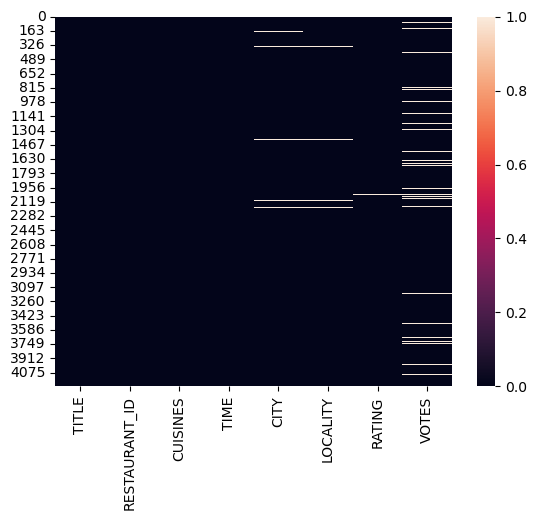

In [91]:
sns.heatmap(data.isnull())

in this dataset we have some null values so let's handle it 

In [92]:
data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [93]:
data['CITY']=data['CITY'].fillna(data['CITY'].mode()[0])
data['LOCALITY']=data['LOCALITY'].fillna(data['LOCALITY'].mode()[0])
data['RATING']=data['RATING'].fillna(data['RATING'].mode()[0])
data['VOTES']=data['VOTES'].fillna(data['VOTES'].mode()[0])

In [94]:
data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

<Axes: >

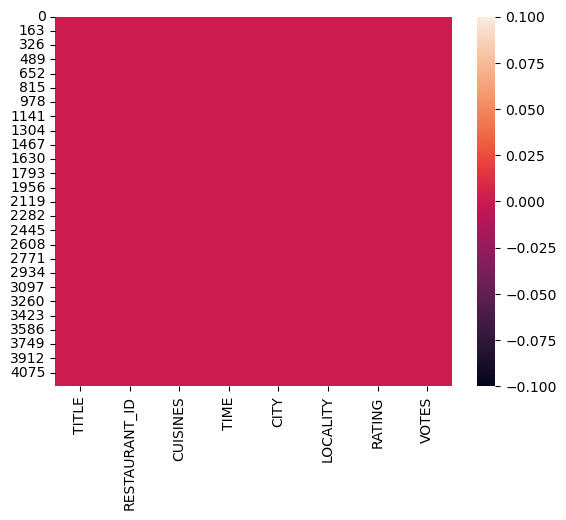

In [95]:
sns.heatmap(data.isnull())

we have filled the null values 

In [99]:
data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [100]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
CASUAL DINING,LOUNGE             1
CLUB,FINE DINING                 1
SWEET SHOP,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
BHOJANALYA                       1
Name: TITLE, Length: 86, dtype: int64


15454    3
12799    3
7656     3
1619     3
11169    3
        ..
4318     1
636      1
7425     1
3631     1
2421     1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


North Indian, Chinese                                 213
North Indian                                          190
South Indian                                          174
Fast Food                                              78
Chinese                                                59
                                                     ... 
South Indian, Kerala, Chinese, North Indian             

# feature  Encoding using (ordinal Encoder)

In [110]:
OE=OrdinalEncoder()
for i in data.columns:
    if data.dtypes[i]=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,4085,1293.0,503.0,110.0,662.0,23.0,823.0
1,75.0,12680,1632.0,933.0,96.0,221.0,22.0,871.0
2,23.0,1411,1455.0,219.0,96.0,411.0,18.0,575.0
3,66.0,204,208.0,1071.0,41.0,456.0,18.0,179.0
4,75.0,13453,1637.0,208.0,78.0,300.0,16.0,394.0
...,...,...,...,...,...,...,...,...
4226,23.0,9057,1425.0,103.0,108.0,597.0,19.0,487.0
4227,66.0,1247,267.0,262.0,9.0,237.0,23.0,722.0
4228,75.0,8617,679.0,1052.0,41.0,696.0,17.0,789.0
4229,75.0,6485,1541.0,215.0,78.0,332.0,0.0,861.0


# scaling the features using (Standard Scaler)

In [112]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(data),columns=data.columns)
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.862742,-0.831362,0.731565,-0.059086,1.336371,1.186360,0.856791,0.713516
1,1.106503,1.096515,1.411712,1.203765,0.974641,-0.691337,0.694755,0.863997
2,-0.862742,-1.431146,1.056591,-0.893156,0.974641,0.117648,0.046608,-0.063971
3,0.765672,-1.701879,-1.445308,1.609053,-0.446444,0.309250,0.046608,-1.305441
4,1.106503,1.269901,1.421744,-0.925461,0.509558,-0.354970,-0.277465,-0.631410
...,...,...,...,...,...,...,...,...
4226,-0.862742,0.283868,0.996401,-1.233832,1.284696,0.909602,0.208645,-0.339853
4227,0.765672,-1.467932,-1.326935,-0.766871,-1.273257,-0.623212,0.856791,0.396878
4228,1.106503,0.185175,-0.500325,1.553252,-0.446444,1.331126,-0.115429,0.606925
4229,1.106503,-0.293037,1.229136,-0.904903,0.509558,-0.218720,-2.870051,0.832647


# checking variance inflation factor

In [113]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,VIF values
0,TITLE,1.075024
1,RESTAURANT_ID,1.005158
2,CUISINES,1.086194
3,TIME,1.016678
4,CITY,1.004461
5,LOCALITY,1.003680
6,RATING,1.007467
7,VOTES,1.002864


In [117]:
model=joblib.load('restaurant_analysis.pkl')
result=pd.DataFrame(model.predict(x))

In [118]:
result

,0
0,1355.0
1,315.0
2,777.0
3,723.5
4,348.5
...,...
4226,1082.5
4227,1244.5
4228,314.2
4229,341.7
